## Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
df = pd.read_csv("bank.csv", delimiter=";")

## Analyzing the Data

   ## Description:
   The data is related with direct marketing campaigns of a Portuguese banking institution.<br/> 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,<br/> 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 


### Input variables:

<ul> 
    <li>1 - age (numeric)</li>
    <li>2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                        "blue-collar","self-employed","retired","technician","services") </li>
    <li>3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)</li>
    <li>4 - education (categorical: "unknown","secondary","primary","tertiary")</li>
    <li>5 - default: has credit in default? (binary: "yes","no")</li>
    <li>6 - balance: average yearly balance, in euros (numeric) </li>
    <li>7 - housing: has housing loan? (binary: "yes","no")</li>
    <li>8 - loan: has personal loan? (binary: "yes","no")</li>
   <li>9 - contact: contact communication type (categorical: "unknown","telephone","cellular") </li>
   <li>10 - day: last contact day of the month (numeric)</li>
   <li>11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")</li>
   <li>12 - duration: last contact duration, in seconds (numeric) </li>
   <li>13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li>
   <li>14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not     previously contacted)</li>
   <li>15 - previous: number of contacts performed before this campaign and for this client (numeric)</li>
   <li>16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")</li>
   <li>17 - y - has the client subscribed a term deposit? (binary: "yes","no")</li>
</ul>

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
def change_column_dtype(column, dtype):
    df[column] = df[column].astype(dtype)

In [10]:
for column in ["age", "day", "campaign", "previous"]:
    change_column_dtype(column, "uint8") 

In [11]:
change_column_dtype("duration", "uint16")

In [12]:
change_column_dtype("pdays", "int16")

In [13]:
categorical_nominal_columns = ["job", "marital", "contact", "month", "poutcome"]
categorical_ordinal_columns = ["education"]
numerical_discrete_columns = ["age", "day", "duration", "campaign", "pdays", "previous"]
numerical_continuous_columns = ["balance"]
binary_columns = ["default", "housing", "loan", "y"]

In [14]:
for column in binary_columns:
    df[column] = df[column].map({'yes': 1, 'no': 0})
    change_column_dtype(column, "uint8")

In [15]:
numerical_columns = df.select_dtypes(include='number')
categorical_columns = df.select_dtypes(include="object")

In [16]:
for column in categorical_columns:
    print(f"{column} uniques: {df[column].unique()}")

job uniques: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital uniques: ['married' 'single' 'divorced']
education uniques: ['tertiary' 'secondary' 'unknown' 'primary']
contact uniques: ['unknown' 'cellular' 'telephone']
month uniques: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome uniques: ['unknown' 'failure' 'other' 'success']


In [17]:
df["job"] = df["job"].map(lambda item: "admin" if item == "admin." else item) 

In [18]:
for column in categorical_columns:
    df[column] = df[column].map(lambda item: np.nan if item == "unknown" else item)

In [19]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

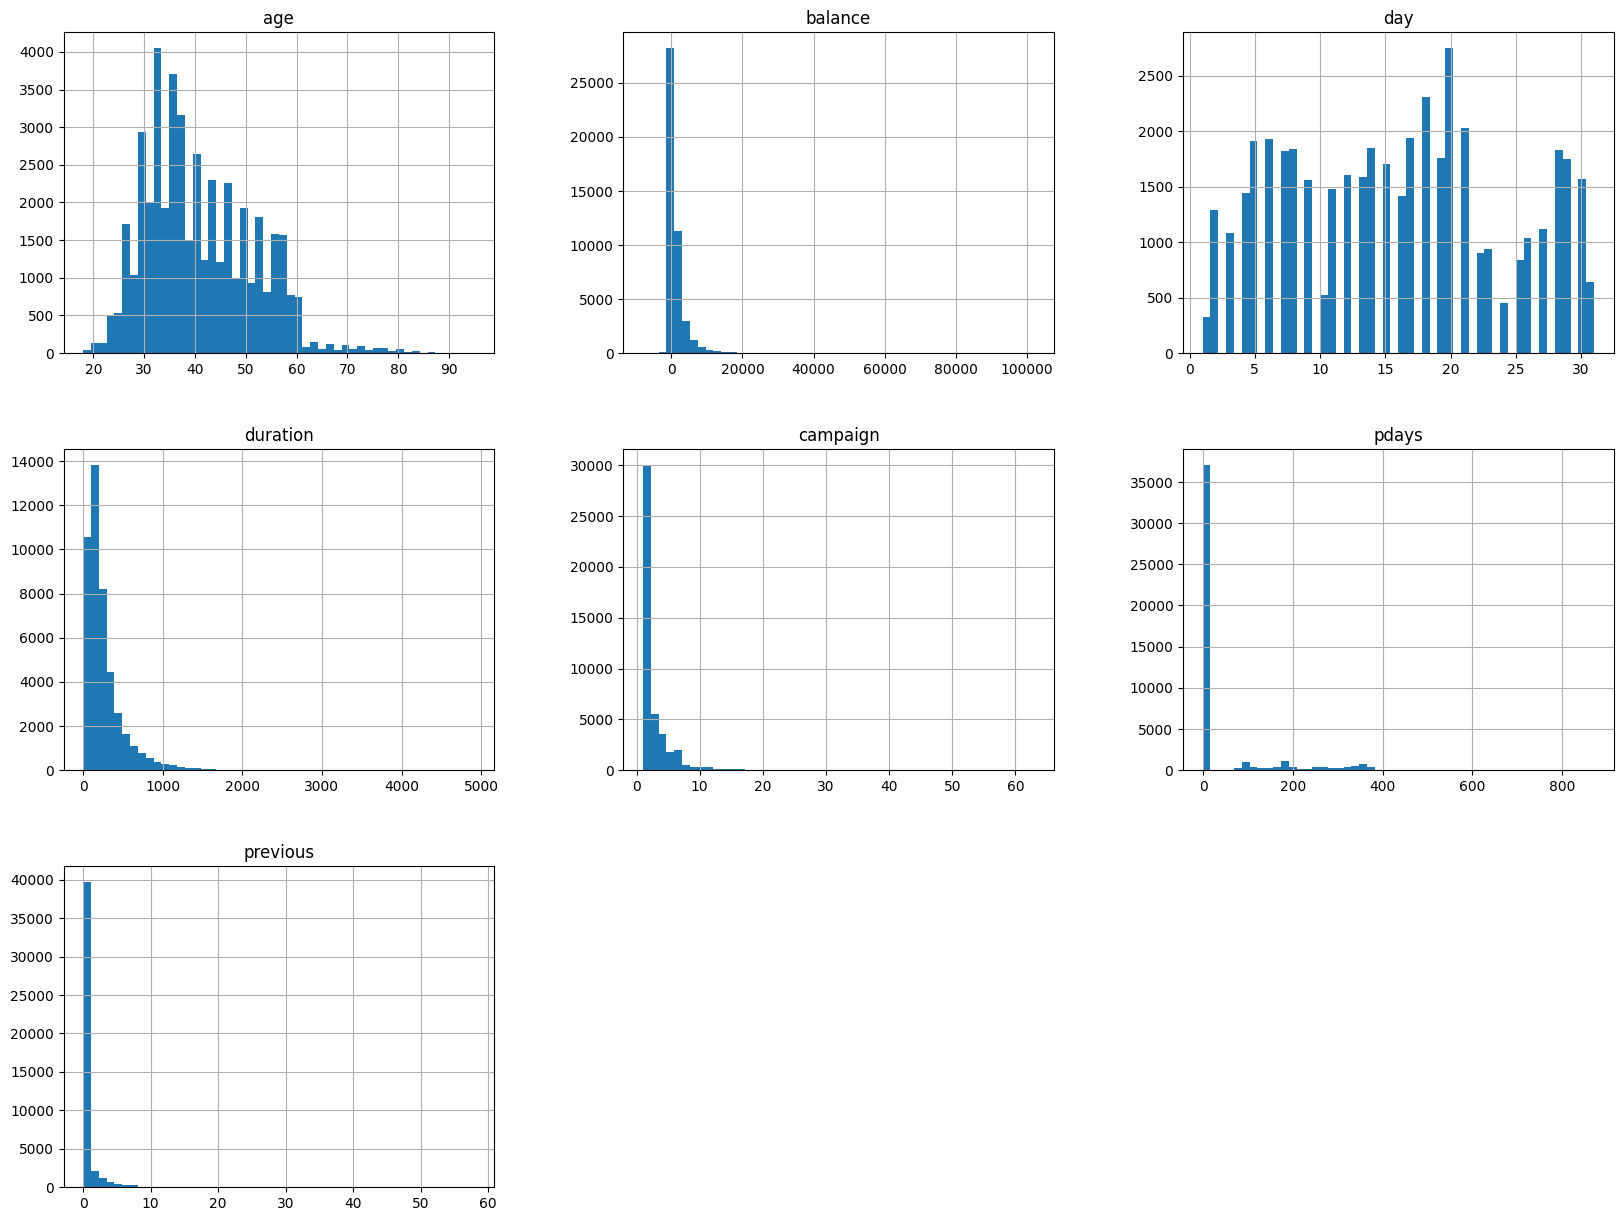

In [20]:
df.drop(columns=binary_columns).hist(bins=50, figsize=(20, 15))
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df["y"])

## EDA

In [23]:
eda_df = train_set.copy()

age
Skew : 0.69


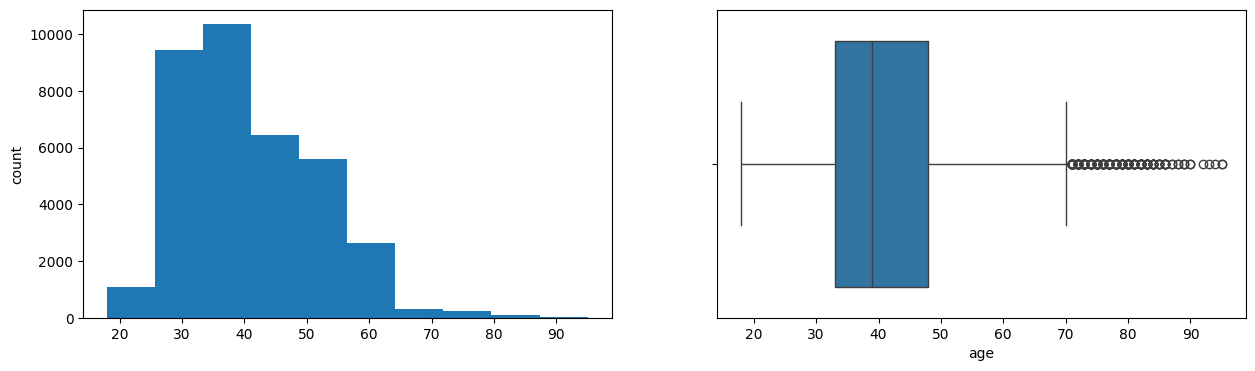

default
Skew : 7.27


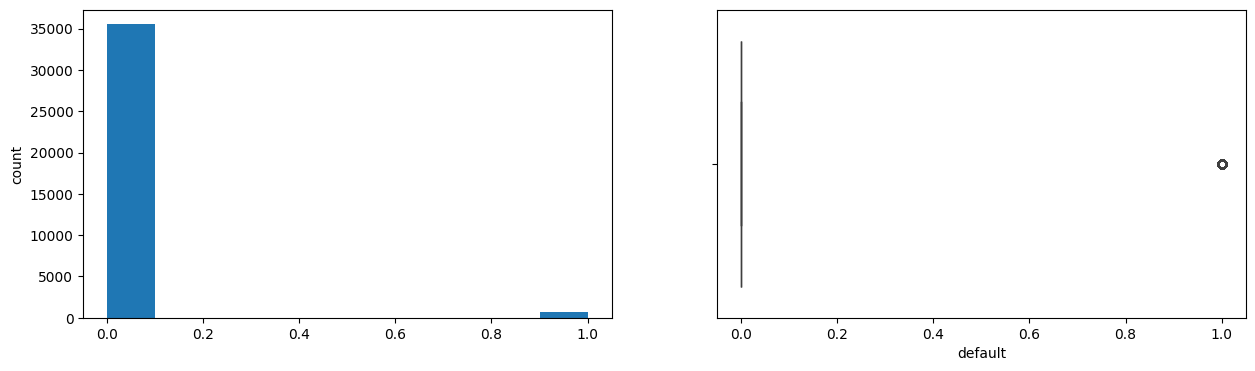

balance
Skew : 8.34


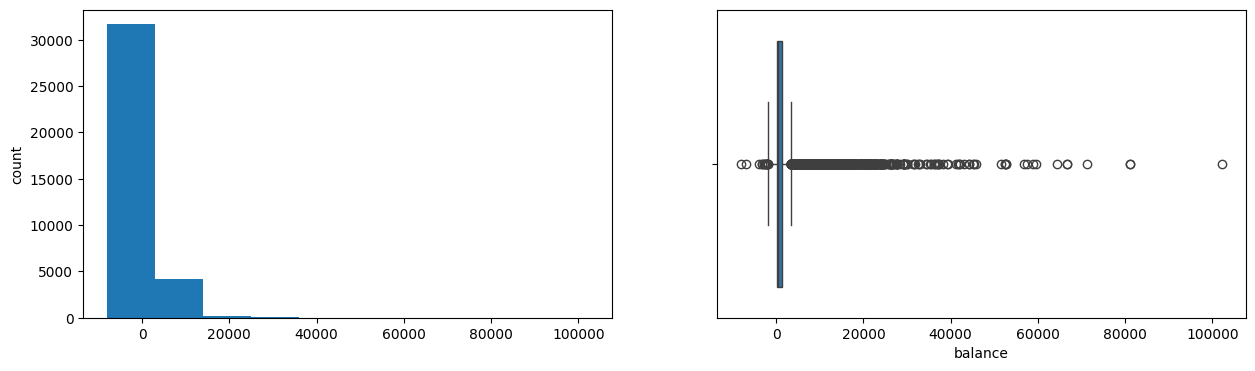

housing
Skew : -0.23


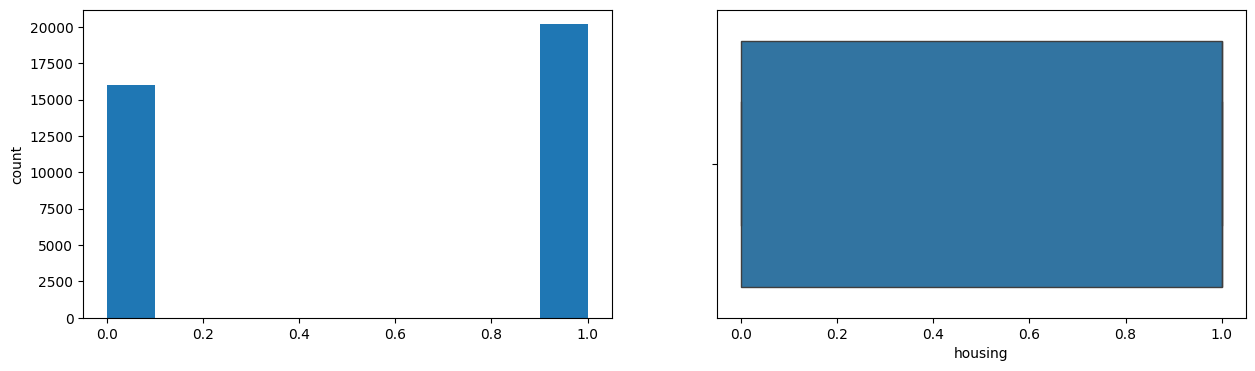

loan
Skew : 1.85


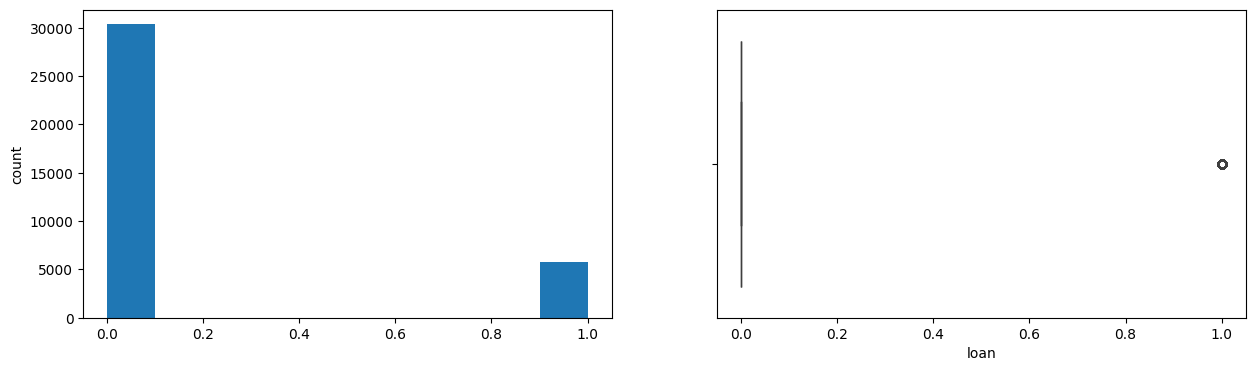

day
Skew : 0.09


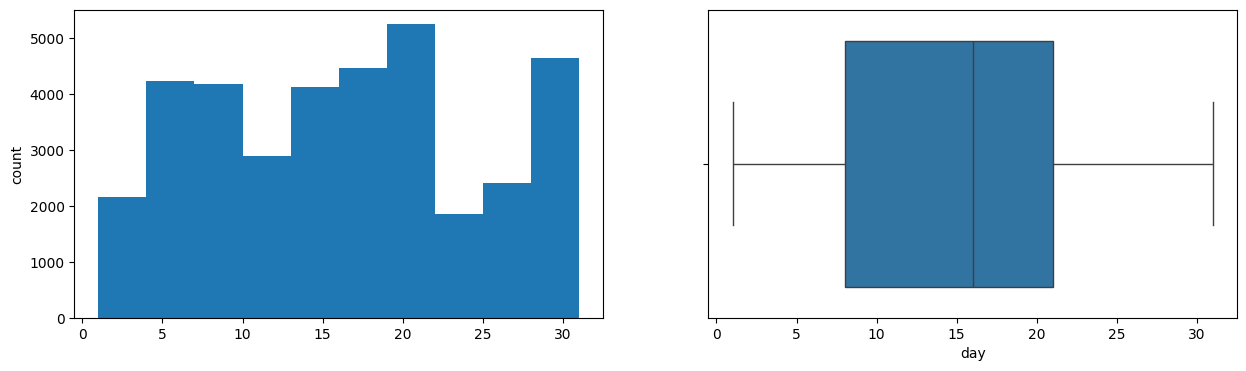

duration
Skew : 3.21


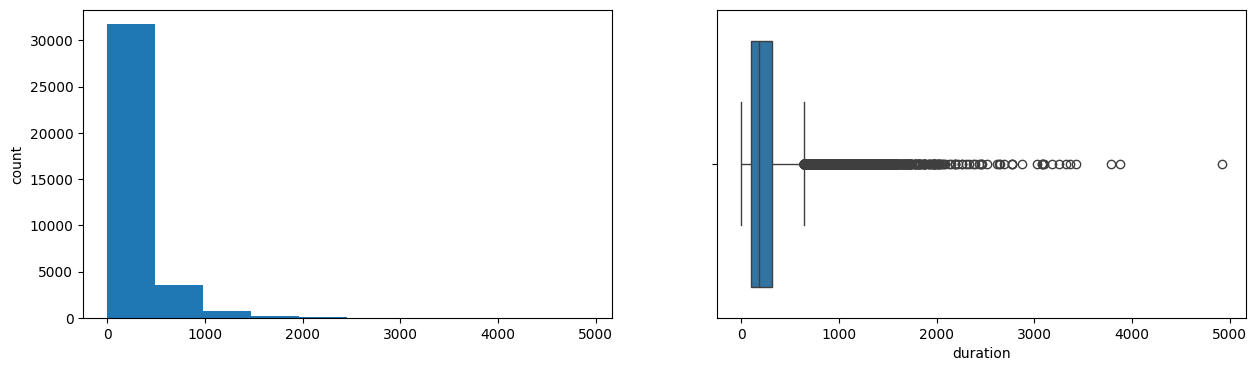

campaign
Skew : 4.94


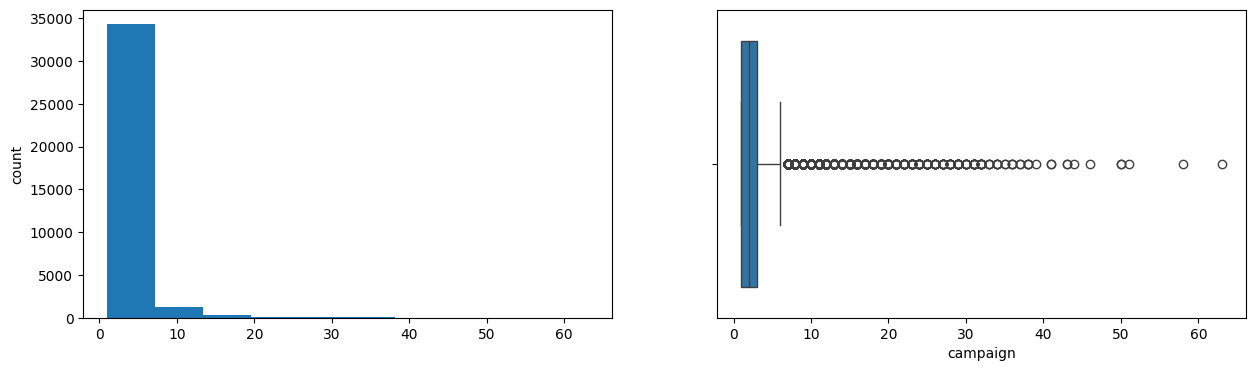

pdays
Skew : 2.62


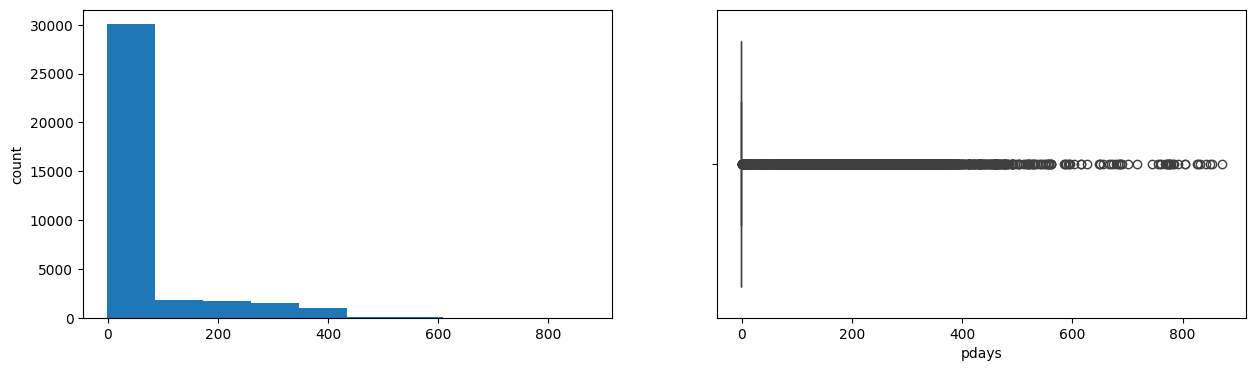

previous
Skew : 8.09


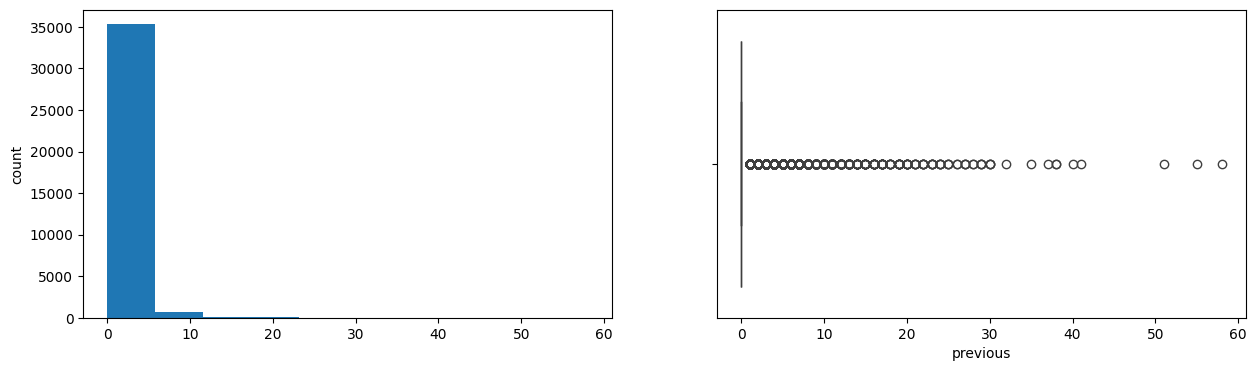

y
Skew : 2.38


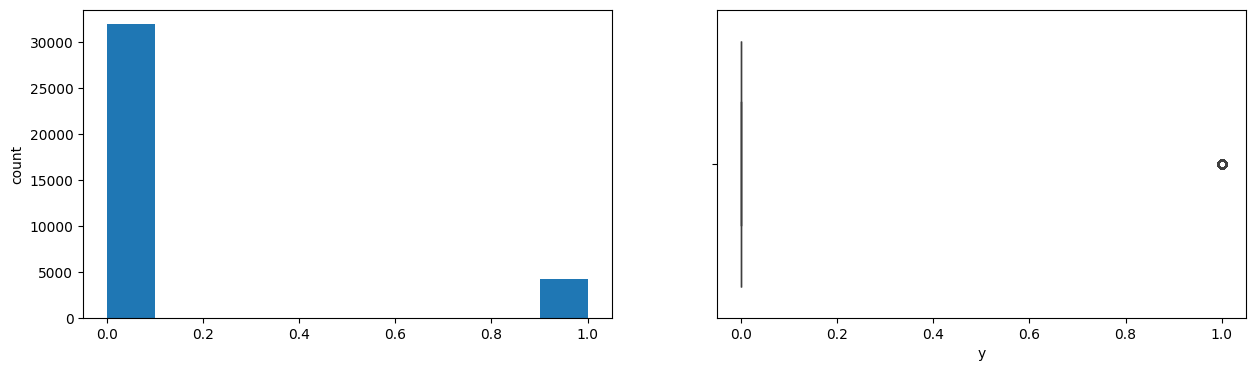

In [24]:
for col in numerical_columns:
    print(col)
    print('Skew :', round(eda_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    eda_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=eda_df[col])
    plt.show()

In [25]:
eda_df["day_cat"] = pd.cut(eda_df["day"],
bins=[0., 5., 10.0, 15.0, 20., 25., 30., np.inf],
labels=[1, 2, 3, 4, 5, 6, 7])

In [26]:
corr_matrix = eda_df.corr(numeric_only=True)

In [27]:
corr_matrix["y"].sort_values(ascending=False)

y           1.000000
duration    0.396742
previous    0.112155
pdays       0.100703
balance     0.055025
age         0.024704
default    -0.024460
day        -0.026595
loan       -0.066525
campaign   -0.071978
housing    -0.139432
Name: y, dtype: float64

In [28]:
corr_matrix

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.000000,-0.018859,0.096164,-0.189143,-0.018716,-0.009765,-0.004284,0.007818,-0.024410,0.002593,0.024704
default,-0.018859,1.000000,-0.066333,-0.004213,0.080089,0.007856,-0.011941,0.013624,-0.027646,-0.023202,-0.024460
balance,0.096164,-0.066333,1.000000,-0.067494,-0.085082,0.002354,0.021114,-0.014405,0.003141,0.022596,0.055025
housing,-0.189143,-0.004213,-0.067494,1.000000,0.043248,-0.031700,0.004452,-0.022074,0.123723,0.041814,-0.139432
loan,-0.018716,0.080089,-0.085082,0.043248,1.000000,0.011784,-0.008520,0.008179,-0.025025,-0.014168,-0.066525
day,-0.009765,0.007856,0.002354,-0.031700,0.011784,1.000000,-0.031352,0.161620,-0.093492,-0.055593,-0.026595
duration,-0.004284,-0.011941,0.021114,0.004452,-0.008520,-0.031352,1.000000,-0.086704,-0.006306,-0.002265,0.396742
campaign,0.007818,0.013624,-0.014405,-0.022074,0.008179,0.161620,-0.086704,1.000000,-0.088898,-0.038065,-0.071978
pdays,-0.024410,-0.027646,0.003141,0.123723,-0.025025,-0.093492,-0.006306,-0.088898,1.000000,0.539411,0.100703
previous,0.002593,-0.023202,0.022596,0.041814,-0.014168,-0.055593,-0.002265,-0.038065,0.539411,1.000000,0.112155


## Preprocessing

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

In [30]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

In [31]:
X_train = train_set.drop("y", axis=1)
y_train = train_set["y"].copy()

In [32]:
X_test = test_set.drop("y", axis=1)
y_test = test_set["y"].copy()

In [33]:
log_pipeline = make_pipeline(
    IterativeImputer(estimator=LGBMRegressor(verbose=-1)),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

In [34]:
categorical_nominal_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
    IterativeImputer(estimator=LGBMClassifier(verbose=-1)))

In [35]:
categorical_ordinal_pipeline = make_pipeline(
    OrdinalEncoder(),
    IterativeImputer(estimator=LGBMClassifier(verbose=-1)))

In [36]:
numerical_pipeline = make_pipeline(
    IterativeImputer(estimator=LGBMRegressor(verbose=-1)),
    StandardScaler())

In [40]:
binary_pipeline = make_pipeline(
    IterativeImputer(estimator=LGBMClassifier(verbose=-1)),
    StandardScaler())

In [38]:
binary_columns.remove("y")

In [39]:
preprocessing = ColumnTransformer([
        ("categorical_nominal", categorical_nominal_pipeline, categorical_nominal_columns),
        ("categorical_ordinal", categorical_ordinal_pipeline, categorical_ordinal_columns),
        ("binary", binary_pipeline, binary_columns),
    ],
    remainder=numerical_pipeline)

## Model

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
f1_score = []
roc_auc = []
accuracy = []

### Stochastic Gradient Descent Classifier

In [40]:
from sklearn.linear_model import SGDClassifier

sgd_clf = make_pipeline(preprocessing, SGDClassifier(random_state=42))

# sgd_f1 = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="f1")
sgd_roc_auc = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="roc_auc")
# sgd_accuracy = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

# f1_score.append({"sgd_f1": sgd_f1.mean()})
roc_auc.append({"sgd_roc_auc": sgd_roc_auc.mean()})
# accuracy.append({"sgd_accuracy": sgd_accuracy.mean()})

# print(sgd_f1)
print(sgd_roc_auc) 
# print(sgd_accuracy) 

[0.88039666 0.89141242 0.89003951]


### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr_clf = make_pipeline(preprocessing, LogisticRegression(random_state=42))

# lr_f1 = cross_val_score(lr_clf, X_train, y_train, cv=3, scoring="f1")
lr_roc_auc = cross_val_score(lr_clf, X_train, y_train, cv=3, scoring="roc_auc")
# lr_accuracy = cross_val_score(lr_clf, X_train, y_train, cv=3, scoring="accuracy")

# f1_score.append({"lr_f1": lr_f1.mean()})
roc_auc.append({"lr_roc_auc": lr_roc_auc.mean()})
# accuracy.append({"lr_accuracy": lr_accuracy.mean()})

# print(lr_f1)
print(lr_roc_auc) 
# print(lr_accuracy) 

[0.90731124 0.90458901 0.90879771]


### SVM

In [42]:
from sklearn.svm import SVC

svc_clf = make_pipeline(preprocessing, SVC(random_state=42))

# svc_f1 = cross_val_score(svc_clf, X_train, y_train, cv=3, scoring="f1")
svc_roc_auc = cross_val_score(svc_clf, X_train, y_train, cv=3, scoring="roc_auc")
# svc_accuracy = cross_val_score(svc_clf, X_train, y_train, cv=3, scoring="accuracy")

# f1_score.append({"svc_f1": svc_f1.mean()})
roc_auc.append({"svc_roc_auc": svc_roc_auc.mean()})
# accuracy.append({"svc_accuracy": svc_accuracy.mean()})

# print(svc_f1)
print(svc_roc_auc) 
# print(svc_accuracy) 

[0.90528138 0.89856557 0.90653987]


### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = make_pipeline(preprocessing, KNeighborsClassifier())

# knn_f1 = cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="f1")
knn_roc_auc = cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="roc_auc")
# knn_accuracy = cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

# f1_score.append({"knn_f1": knn_f1.mean()})
roc_auc.append({"knn_roc_auc": knn_roc_auc.mean()})
# accuracy.append({"knn_accuracy": knn_accuracy.mean()})

# print(knn_f1)
print(knn_roc_auc) 
# print(knn_accuracy) 

[0.82941024 0.82040846 0.8320217 ]


### Gaussian Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = make_pipeline(preprocessing, GaussianNB())

# gnb_f1 = cross_val_score(gnb_clf, X_train, y_train, cv=3, scoring="f1")
gnb_roc_auc = cross_val_score(gnb_clf, X_train, y_train, cv=3, scoring="roc_auc")
# gnb_accuracy = cross_val_score(gnb_clf, X_train, y_train, cv=3, scoring="accuracy")

# f1_score.append({"gnb_f1": gnb_f1.mean()})
roc_auc.append({"gnb_roc_auc": gnb_roc_auc.mean()})
# accuracy.append({"gnb_accuracy": gnb_accuracy.mean()})

# print(gnb_f1)
print(gnb_roc_auc) 
# print(gnb_accuracy) 

[0.81089511 0.79970861 0.80859745]


### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))

# dt_f1 = cross_val_score(dt_clf, X_train, y_train, cv=3, scoring="f1")
dt_roc_auc = cross_val_score(dt_clf, X_train, y_train, cv=3, scoring="roc_auc")
# dt_accuracy = cross_val_score(dt_clf, X_train, y_train, cv=3, scoring="accuracy")

# f1_score.append({"dt_f1": dt_f1.mean()})
roc_auc.append({"dt_roc_auc": dt_roc_auc.mean()})
# accuracy.append({"dt_accuracy": dt_accuracy.mean()})

# print(dt_f1)
print(dt_roc_auc) 
# print(dt_accuracy) 

[0.70549702 0.70823051 0.72339393]


### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))

# rf_f1 = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="f1")
rf_roc_auc = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="roc_auc")
# rf_accuracy = cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy")

# f1_score.append({"rf_f1": rf_f1.mean()})
roc_auc.append({"rf_roc_auc": rf_roc_auc.mean()})
# accuracy.append({"rf_accuracy": rf_accuracy.mean()})

# print(rf_f1)
print(rf_roc_auc) 
# print(rf_accuracy) 

[0.92757101 0.92601343 0.92806257]


### Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = make_pipeline(preprocessing, GradientBoostingClassifier(random_state=42))

# gb_f1 = cross_val_score(gb_clf, X_train, y_train, cv=3, scoring="f1")
gb_roc_auc = cross_val_score(gb_clf, X_train, y_train, cv=3, scoring="roc_auc")
# gb_accuracy = cross_val_score(gb_clf, X_train, y_train, cv=3, scoring="accuracy")

# f1_score.append({"gb_f1": gb_f1.mean()})
roc_auc.append({"gb_roc_auc": gb_roc_auc.mean()})
# accuracy.append({"gb_accuracy": gb_accuracy.mean()})

# print(gb_f1)
print(gb_roc_auc) 
# print(gb_accuracy) 

[0.92448251 0.92425594 0.92721158]


### LGBM Classifier

In [48]:
from lightgbm import LGBMClassifier

lgbm_clf = make_pipeline(preprocessing, LGBMClassifier(random_state=42, verbose=-1))

# lgbm_f1 = cross_val_score(lgbm_clf, X_train, y_train, cv=3, scoring="f1")
lgbm_roc_auc = cross_val_score(lgbm_clf, X_train, y_train, cv=3, scoring="roc_auc")
# lgbm_accuracy = cross_val_score(lgbm_clf, X_train, y_train, cv=3, scoring="accuracy")

# f1_score.append({"lgbm_f1": lgbm_f1.mean()})
roc_auc.append({"lgbm_roc_auc": lgbm_roc_auc.mean()})
# accuracy.append({"lgbm_accuracy": lgbm_accuracy.mean()})

# print(lgbm_f1)
print(lgbm_roc_auc) 
# print(lgbm_accuracy) 

[0.93489843 0.93333537 0.93720326]


### XGBoost Classifier

In [49]:
from xgboost.sklearn import XGBClassifier

xgb_clf = make_pipeline(preprocessing, XGBClassifier(random_state=42))

# xgb_f1 = cross_val_score(xgb_clf, X_train, y_train, cv=3, scoring="f1")
xgb_roc_auc = cross_val_score(xgb_clf, X_train, y_train, cv=3, scoring="roc_auc")
# xgb_accuracy = cross_val_score(xgb_clf, X_train, y_train, cv=3, scoring="accuracy")

# f1_score.append({"xgb_f1": xgb_f1.mean()})
roc_auc.append({"xgb_roc_auc": xgb_roc_auc.mean()})
# accuracy.append({"xgb_accuracy": xgb_accuracy.mean()})

# print(xgb_f1)
print(xgb_roc_auc) 
# print(xgb_accuracy) 

[0.92952782 0.92795036 0.93233305]


### Catboost

In [43]:
from catboost import CatBoostClassifier

cb_clf = make_pipeline(preprocessing, CatBoostClassifier(random_state=42, verbose=0))

# cb_f1 = cross_val_score(cb_clf, X_train, y_train, cv=3, scoring="f1")
cb_roc_auc = cross_val_score(cb_clf, X_train, y_train, cv=3, scoring="roc_auc")
# cb_accuracy = cross_val_score(cb_clf, X_train, y_train, cv=3, scoring="accuracy")

# f1_score.append({"cb_f1": cb_f1.mean()})
roc_auc.append({"cb_roc_auc": cb_roc_auc.mean()})
# accuracy.append({"cb_accuracy": cb_accuracy.mean()})

# print(cb_f1)
print(cb_roc_auc) 
# print(cb_accuracy) 

[0.93861171 0.93593385 0.93962575]


In [44]:
cb_roc_auc.mean()

0.9380571034619125

In [88]:
sorted(roc_auc, key=lambda items: list(items.values()), reverse=True)

[{'cb_roc_auc': 0.9380571034619125},
 {'lgbm_roc_auc': 0.9351456862541209},
 {'xgb_roc_auc': 0.9299370789830957},
 {'rf_roc_auc': 0.9272156701247402},
 {'gb_roc_auc': 0.9253166751953579},
 {'lr_roc_auc': 0.9068993216269478},
 {'svc_roc_auc': 0.9034622734091918},
 {'sgd_roc_auc': 0.8872828624325196},
 {'knn_roc_auc': 0.827280133174377},
 {'gnb_roc_auc': 0.806400390618502},
 {'dt_roc_auc': 0.7123738181798117}]

In [52]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

In [60]:
catboost = CatBoostClassifier(verbose=False)

param_space = {
    'learning_rate': (0.01, 0.7, 'log-uniform'),
    'depth': (3, 10),
    'n_estimators': (100, 1000),
    'l2_leaf_reg': (1, 10),
    'subsample': (0.3, 1.0, 'uniform'),
    'colsample_bylevel': (0.3, 1.0, 'uniform'),
    'min_child_samples': (1, 20),
    'border_count': (1, 255)
}

cat_b = make_pipeline(preprocessing, RandomizedSearchCV(
    catboost, param_space, n_iter=5, scoring='roc_auc', cv=5, verbose=False))

cb_ftr_roc_auc = cross_val_score(cat_b, X_train, y_train, cv=3, scoring="roc_auc")

print(cb_ftr_roc_auc) 

[0.91732932 0.93532662        nan]


In [57]:
catboost = CatBoostClassifier(verbose=False)

param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'depth': (3, 10),
    'n_estimators': (100, 1000),
    'l2_leaf_reg': (1, 10),
    'subsample': (0.5, 1.0, 'uniform'),
    'colsample_bylevel': (0.5, 1.0, 'uniform'),
    'min_child_samples': (1, 20),
    'border_count': (1, 255)
}

cat_b = make_pipeline(preprocessing, BayesSearchCV(
    catboost, param_space, n_iter=5, scoring='roc_auc', cv=2, verbose=False))

In [58]:
cb_ft_roc_auc = cross_val_score(cat_b, X_train, y_train, cv=3, scoring="roc_auc")

print(cb_ft_roc_auc) 

[0.9372946  0.9344855  0.93891863]


In [59]:
cb_ft_roc_auc.mean()

0.93689957551764

In [45]:
final_model = cb_clf

In [46]:
final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)

In [47]:
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

In [48]:
roc_auc_score(y_test, predictions)

0.7391743498265296

In [49]:
f1_score(y_test, predictions)

0.5793693212185996

In [50]:
accuracy_score(y_test, predictions)

0.9129713590622581